# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

[Te proporcionamos algunos comentarios para orientarte mientras completas este proyecto. Pero debes asegurarte de eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]

[Antes de sumergirte en el análisis de datos, explica por tu propia cuenta el propósito del proyecto y las acciones que planeas realizar.]

[Ten en cuenta que estudiar, modificar y analizar datos es un proceso iterativo. Es normal volver a los pasos anteriores y corregirlos/ampliarlos para permitir nuevos pasos.]

## Inicialización

In [1]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy import stats as st
import seaborn as sns

## Cargar datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames
calls = pd.read_csv('/datasets/megaline_calls.csv')
internet = pd.read_csv('/datasets/megaline_internet.csv')
messages = pd.read_csv('/datasets/megaline_messages.csv')
plans = pd.read_csv('/datasets/megaline_plans.csv')
users = pd.read_csv('/datasets/megaline_users.csv')

## Preparar los datos

[Los datos para este proyecto se dividen en varias tablas. Explora cada una para tener una comprensión inicial de los datos. Si es necesario, haz las correcciones requeridas en cada tabla.]

## Tarifas

In [3]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
display(plans.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


None

In [4]:
# Imprime una muestra de los datos para las tarifas
display(plans.head())


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

No hay valores duplicados ni valores ausentes. Los datos se observan bien y los tipos de datos están bien.

Tipo de dato flotante para el valor de un mensaje y de un minuto.

Tipo de dato entero para los mensajes, mb y minutos incluidos, además, para el valor a pagar mensual y el valor por Gb en doláres.

Tipo de datos objeto para los nombres de cada uno de los planes.

## Corregir datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [5]:
#No hay datos a corregir

## Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [6]:
#convertir las mb a gb
plans['gb_per_month_included'] = plans['mb_per_month_included'] / 1024
plans.drop('mb_per_month_included', axis =1 , inplace= True)

display(plans.head())

,messages_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,500,20,10,0.03,0.03,surf,15.0
1,1000,3000,70,7,0.01,0.01,ultimate,30.0


## Usuarios/as

In [7]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
display(users.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


None

In [8]:
# Imprime una muestra de datos para usuarios

display(users.sample(15))
print()
print('Valores ausentes:')
print(users.isna().sum())
print()
print('Valores duplicados:')
display(users['user_id'].value_counts())

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
185,1185,Loria,Freeman,47,"Louisville/Jefferson County, KY-IN MSA",2018-01-14,ultimate,NaN
464,1464,Burt,Burke,70,"Providence-Warwick, RI-MA MSA",2018-11-07,surf,NaN
122,1122,Lashay,Reese,57,"Miami-Fort Lauderdale-West Palm Beach, FL MSA",2018-03-04,surf,NaN
227,1227,Vanesa,Willis,29,"Dallas-Fort Worth-Arlington, TX MSA",2018-01-17,surf,NaN
400,1400,Kenton,Hickman,72,"Riverside-San Bernardino-Ontario, CA MSA",2018-03-08,surf,NaN
268,1268,Britni,Bowers,33,"Fresno, CA MSA",2018-01-13,surf,NaN
364,1364,Clarine,Bonner,75,"San Diego-Chula Vista-Carlsbad, CA MSA",2018-08-09,surf,NaN
348,1348,Carl,Rutledge,60,"Detroit-Warren-Dearborn, MI MSA",2018-10-05,surf,NaN
146,1146,Loma,Mcneil,42,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-10-13,surf,NaN
486,1486,Sang,Solis,29,"Orlando-Kissimmee-Sanford, FL MSA",2018-12-05,surf,NaN



Valores ausentes:
user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64

Valores duplicados:


1024    1
1353    1
1366    1
1365    1
1364    1
       ..
1185    1
1184    1
1183    1
1182    1
1023    1
Name: user_id, Length: 500, dtype: int64

[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

Hay 466 valores ausentes en la columna churn_date. Los valores ausentes NaN se van a procesar con fillna() con el valor de 0.
No hay valores duplicados en el DataFrame.
El tipo de datos se va a cambiar a tipo de dato fecha, ya que en este momento su tipo de dato es object

Los tipos de datos para las columnas reg_date y churn_date aparecen como tipo objeto, sin embargo estos datos son fechas por lo que debe de cambiarse a  datetime64[ns]


### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [9]:
users['churn_date'] = users['churn_date'].fillna(0)
print(users.isna().sum())
print()
display(users.sample(15))

user_id       0
first_name    0
last_name     0
age           0
city          0
reg_date      0
plan          0
churn_date    0
dtype: int64



,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
367,1367,Minh,Fischer,18,"Baltimore-Columbia-Towson, MD MSA",2018-07-23,surf,0
381,1381,German,Burris,44,"Austin-Round Rock-Georgetown, TX MSA",2018-08-30,surf,0
453,1453,Robt,Tyler,51,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-07-09,ultimate,0
100,1100,Aaron,Rowe,65,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-13,surf,0
395,1395,Leonard,Wooten,24,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-06-19,ultimate,0
442,1442,Terrell,Caldwell,66,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-05-25,ultimate,0
126,1126,Jermaine,Mcguire,68,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-06-02,ultimate,0
236,1236,Odell,Juarez,74,"Minneapolis-St. Paul-Bloomington, MN-WI MSA",2018-04-04,ultimate,0
35,1035,Jeff,Cummings,67,"Charlotte-Concord-Gastonia, NC-SC MSA",2018-12-08,surf,0
68,1068,Marcel,Jimenez,47,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-01-29,surf,0


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [10]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d') 
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')  
    
display(users.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  500 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


None

## Llamadas

In [11]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas

display(calls.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


None

In [12]:
# Imprime una muestra de datos para las llamadas

display(calls.sample(15))
print()
print('Valores duplicados: ')
display(calls.value_counts())
print()
print('Valores ausentes: ')
print(users.isna().sum())

,id,user_id,call_date,duration
98215,1352_680,1352,2018-11-01,15.62
23751,1088_217,1088,2018-12-02,10.45
92005,1330_42,1330,2018-12-12,12.21
79780,1285_281,1285,2018-08-26,7.56
32044,1120_475,1120,2018-07-15,11.02
92142,1331_33,1331,2018-09-19,1.83
31229,1117_203,1117,2018-05-29,0.00
115052,1403_126,1403,2018-06-05,8.57
130343,1468_99,1468,2018-11-09,0.44
101220,1361_322,1361,2018-10-11,11.63



Valores duplicados: 


id        user_id  call_date   duration
1000_145  1000     2018-12-27  13.66       1
1329_678  1329     2018-12-13  9.55        1
1329_70   1329     2018-11-18  8.09        1
1329_7    1329     2018-12-08  5.72        1
1329_699  1329     2018-10-29  11.34       1
                                          ..
1166_90   1166     2018-12-07  14.68       1
1166_9    1166     2018-11-10  0.00        1
1166_89   1166     2018-10-13  0.00        1
1166_88   1166     2018-10-21  0.00        1
1499_99   1499     2018-10-04  0.00        1
Length: 137735, dtype: int64


Valores ausentes: 
user_id       0
first_name    0
last_name     0
age           0
city          0
reg_date      0
plan          0
churn_date    0
dtype: int64


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

No hay valores ausentes 

No hay valores duplicados


El tipo de dato de la columna  call_date es object, sin embargo este dato corresponde a una fecha, por lo que se hará el cambio de tipo de dato object a datetime64[ns].

La duración de la llamada debe de darse en minutos y en números entero, por lo que se hará ese cambio también. 

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [13]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format = '%Y-%m-%d')

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [14]:
#Agregar columna month

calls['month'] = calls['call_date'].dt.month
display(calls)

,id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,8.52,12
1,1000_145,1000,2018-12-27,13.66,12
2,1000_247,1000,2018-12-27,14.48,12
3,1000_309,1000,2018-12-28,5.76,12
4,1000_380,1000,2018-12-30,4.22,12
...,...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72,11
137731,1499_200,1499,2018-10-20,10.89,10
137732,1499_201,1499,2018-09-21,8.12,9
137733,1499_202,1499,2018-10-10,0.37,10


## Mensajes

In [15]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
display(messages.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


None

In [16]:
# Imprime una muestra de datos para los mensajes

display(messages.sample(15))
print()
print('Valores duplicados: ')
display(messages.value_counts())
print()
print('Valores ausentes: ')
print(messages.isna().sum())

,id,user_id,message_date
68810,1445_38,1445,2018-04-07
29364,1180_445,1180,2018-12-13
10819,1077_90,1077,2018-10-27
56989,1362_54,1362,2018-06-30
74573,1480_328,1480,2018-12-18
20871,1131_210,1131,2018-08-07
31197,1195_64,1195,2018-12-07
14272,1098_291,1098,2018-10-05
58556,1372_28,1372,2018-12-29
52528,1336_527,1336,2018-08-14



Valores duplicados: 


id        user_id  message_date
1000_125  1000     2018-12-27      1
1330_192  1330     2018-12-26      1
1330_189  1330     2018-12-28      1
1330_185  1330     2018-12-16      1
1330_184  1330     2018-11-18      1
                                  ..
1151_38   1151     2018-11-03      1
1151_37   1151     2018-09-16      1
1151_36   1151     2018-11-11      1
1151_35   1151     2018-08-24      1
1497_68   1497     2018-12-21      1
Length: 76051, dtype: int64


Valores ausentes: 
id              0
user_id         0
message_date    0
dtype: int64


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]


No hay valores ausentes 

No hay valores duplicados

El tipo de dato de la columna  message_date es object, sin embargo este dato corresponde a una fecha, por lo que se hará el cambio de tipo de dato object a datetime64[ns].

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [17]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format = '%Y-%m-%d')
print(messages.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB
None


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [18]:
#Agregar la columna month
messages['month'] = messages['message_date'].dt.month
display(messages)

,id,user_id,message_date,month
0,1000_125,1000,2018-12-27,12
1,1000_160,1000,2018-12-31,12
2,1000_223,1000,2018-12-31,12
3,1000_251,1000,2018-12-27,12
4,1000_255,1000,2018-12-26,12
...,...,...,...,...
76046,1497_526,1497,2018-12-24,12
76047,1497_536,1497,2018-12-24,12
76048,1497_547,1497,2018-12-31,12
76049,1497_558,1497,2018-12-24,12


## Internet

In [19]:
# Imprime la información general/resumida sobre el DataFrame de internet

display(internet.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


None

In [20]:
# Imprime una muestra de datos para el tráfico de internet

display(internet.sample(15))
print()
print('Valores duplicados: ')
display(internet.value_counts())
print()
print('Valores ausentes: ')
print(internet.isna().sum())

,id,user_id,session_date,mb_used
2400,1011_140,1011,2018-06-26,0.00
76683,1359_370,1359,2018-05-02,523.78
17668,1079_273,1079,2018-11-29,313.10
98579,1466_60,1466,2018-09-18,432.21
58658,1263_462,1263,2018-09-27,177.28
96200,1449_140,1449,2018-11-17,459.05
68187,1318_75,1318,2018-12-11,248.30
99037,1467_174,1467,2018-05-13,477.91
37512,1170_204,1170,2018-10-24,452.00
6698,1038_186,1038,2018-11-23,791.92



Valores duplicados: 


id        user_id  session_date  mb_used
1000_13   1000     2018-12-29    89.86      1
1327_116  1327     2018-12-13    317.05     1
1327_125  1327     2018-10-07    0.00       1
1327_124  1327     2018-10-10    602.05     1
1327_123  1327     2018-09-09    196.49     1
                                           ..
1157_121  1157     2018-09-01    587.62     1
1157_120  1157     2018-10-07    318.58     1
1157_12   1157     2018-10-08    0.00       1
1157_119  1157     2018-07-29    0.00       1
1499_99   1499     2018-09-21    179.22     1
Length: 104825, dtype: int64


Valores ausentes: 
id              0
user_id         0
session_date    0
mb_used         0
dtype: int64


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]


No hay valores ausentes 

No hay valores duplicados

El tipo de dato de la columna  session_date es object, sin embargo este dato corresponde a una fecha, por lo que se hará el cambio de tipo de dato object a datetime64[ns].

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [21]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format = '%Y-%m-%d')
print(internet.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB
None


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [22]:
#Agregar columna month

internet['month'] = internet['session_date'].dt.month
display(internet)




,id,user_id,session_date,mb_used,month
0,1000_13,1000,2018-12-29,89.86,12
1,1000_204,1000,2018-12-31,0.00,12
2,1000_379,1000,2018-12-28,660.40,12
3,1000_413,1000,2018-12-26,270.99,12
4,1000_442,1000,2018-12-27,880.22,12
...,...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06,10
104821,1499_216,1499,2018-12-30,304.72,12
104822,1499_217,1499,2018-09-22,292.75,9
104823,1499_218,1499,2018-12-07,0.00,12


## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [23]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras

display(plans.head())

,messages_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,500,20,10,0.03,0.03,surf,15.0
1,1000,3000,70,7,0.01,0.01,ultimate,30.0


## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [24]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.


merged_user_info = pd.merge(calls, users, on='user_id', how='left')

calls_month = merged_user_info.groupby(['user_id', 'month'])['user_id'].count().reset_index(name='calls_made')


display(calls_month.head(15))



,user_id,month,calls_made
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64
5,1001,12,56
6,1002,10,11
7,1002,11,55
8,1002,12,47
9,1003,12,149


In [25]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.

min_month =merged_user_info.groupby(['user_id','month'])['duration'].sum().reset_index(name='calls_duration')

display(min_month.head(15))


,user_id,month,calls_duration
0,1000,12,116.83
1,1001,8,171.14
2,1001,9,297.69
3,1001,10,374.11
4,1001,11,404.59
5,1001,12,392.93
6,1002,10,54.13
7,1002,11,359.76
8,1002,12,363.24
9,1003,12,1041.00


In [26]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.

merged_message_info = pd.merge(messages, users, on='user_id', how='left')

message_month = merged_message_info.groupby(['user_id', 'month'])['user_id'].count().reset_index(name = 'messages_per_month')

display(message_month.head(15))


,user_id,month,messages_per_month
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
5,1001,12,44
6,1002,10,15
7,1002,11,32
8,1002,12,41
9,1003,12,50


In [27]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.

internet['month'] = internet['session_date'].dt.month

merged_internet_info = pd.merge(internet, users, on = 'user_id', how = 'left')

internet_month = merged_internet_info.groupby(['user_id', 'month'])['mb_used'].sum().reset_index(name = 'mb_used_per_month')

internet_month['gb_used_per_month'] = internet_month['mb_used_per_month'] / 1024
internet_month['gb_used_per_month'] = np.ceil(internet_month['gb_used_per_month'])
internet.drop('mb_used', axis =1 , inplace= True)

internet_month['gb_used_per_month'] = internet_month['gb_used_per_month'].astype('int')



display(internet_month.head(15))

,user_id,month,mb_used_per_month,gb_used_per_month
0,1000,12,1901.47,2
1,1001,8,6919.15,7
2,1001,9,13314.82,14
3,1001,10,22330.49,22
4,1001,11,18504.30,19
5,1001,12,19369.18,19
6,1002,10,6552.01,7
7,1002,11,19345.08,19
8,1002,12,14396.24,15
9,1003,12,27044.14,27


[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]

In [28]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month

#fusionar llamadas y minutos

month_data_users = pd.merge(calls_month, min_month, on=['user_id', 'month'], how = 'outer')

#fusionar merged_data con messages

month_data_users = pd.merge(month_data_users, message_month, on=['user_id', 'month'], how = 'outer')

#Fusionar lo anterior con el internet

month_data_users = pd.merge(month_data_users, internet_month, on=['user_id', 'month'], how = 'outer')

display(month_data_users.head(15))


,user_id,month,calls_made,calls_duration,messages_per_month,mb_used_per_month,gb_used_per_month
0,1000,12,16.0,116.83,11.0,1901.47,2.0
1,1001,8,27.0,171.14,30.0,6919.15,7.0
2,1001,9,49.0,297.69,44.0,13314.82,14.0
3,1001,10,65.0,374.11,53.0,22330.49,22.0
4,1001,11,64.0,404.59,36.0,18504.30,19.0
5,1001,12,56.0,392.93,44.0,19369.18,19.0
6,1002,10,11.0,54.13,15.0,6552.01,7.0
7,1002,11,55.0,359.76,32.0,19345.08,19.0
8,1002,12,47.0,363.24,41.0,14396.24,15.0
9,1003,12,149.0,1041.00,50.0,27044.14,27.0


In [29]:
# Añade la información de la tarifa

plan_used = pd.merge(users, plans, left_on='plan', right_on='plan_name', how='left')

month_data_users = pd.merge(month_data_users, plan_used, on=['user_id'], how = 'outer')




display(month_data_users.head(15))

,user_id,month,calls_made,calls_duration,messages_per_month,mb_used_per_month,gb_used_per_month,first_name,last_name,age,...,plan,churn_date,messages_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,1000,12.0,16.0,116.83,11.0,1901.47,2.0,Anamaria,Bauer,45,...,ultimate,1970-01-01,1000,3000,70,7,0.01,0.01,ultimate,30.0
1,1001,8.0,27.0,171.14,30.0,6919.15,7.0,Mickey,Wilkerson,28,...,surf,1970-01-01,50,500,20,10,0.03,0.03,surf,15.0
2,1001,9.0,49.0,297.69,44.0,13314.82,14.0,Mickey,Wilkerson,28,...,surf,1970-01-01,50,500,20,10,0.03,0.03,surf,15.0
3,1001,10.0,65.0,374.11,53.0,22330.49,22.0,Mickey,Wilkerson,28,...,surf,1970-01-01,50,500,20,10,0.03,0.03,surf,15.0
4,1001,11.0,64.0,404.59,36.0,18504.30,19.0,Mickey,Wilkerson,28,...,surf,1970-01-01,50,500,20,10,0.03,0.03,surf,15.0
5,1001,12.0,56.0,392.93,44.0,19369.18,19.0,Mickey,Wilkerson,28,...,surf,1970-01-01,50,500,20,10,0.03,0.03,surf,15.0
6,1002,10.0,11.0,54.13,15.0,6552.01,7.0,Carlee,Hoffman,36,...,surf,1970-01-01,50,500,20,10,0.03,0.03,surf,15.0
7,1002,11.0,55.0,359.76,32.0,19345.08,19.0,Carlee,Hoffman,36,...,surf,1970-01-01,50,500,20,10,0.03,0.03,surf,15.0
8,1002,12.0,47.0,363.24,41.0,14396.24,15.0,Carlee,Hoffman,36,...,surf,1970-01-01,50,500,20,10,0.03,0.03,surf,15.0
9,1003,12.0,149.0,1041.00,50.0,27044.14,27.0,Reynaldo,Jenkins,52,...,surf,1970-01-01,50,500,20,10,0.03,0.03,surf,15.0


[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

In [30]:
# Calcula el ingreso mensual para cada usuario

#Minutos en exceso
month_data_users['dif_minutes'] = month_data_users['calls_duration'] - month_data_users['minutes_included']
month_data_users['dif_minutes'] = month_data_users['dif_minutes'].apply(lambda x: max(x,0))

#Mensajes en exceso
month_data_users['dif_messages'] = month_data_users['messages_per_month'] - month_data_users['messages_included']
month_data_users['dif_messages'] = month_data_users['dif_messages'].apply(lambda x: max(x,0))

#Gb en exceso
month_data_users['dif_gb'] = month_data_users['gb_used_per_month'] - month_data_users['gb_per_month_included']
month_data_users['dif_gb'] = month_data_users['dif_gb'].apply(lambda x: max(x,0))

#Valor a pagar por el exceso


# Calcular el costo adicional para los minutos, mensajes y GB
def extra_cost(row):
    if row['plan'] == 'Ultimate':
        minute_extra = 0.01
        message_extra = 0.01
        gb_extra = 7
    else:  
        minute_extra = 0.03
        message_extra = 0.03
        gb_extra = 10
    
    total_cost = row['dif_minutes'] * minute_extra + row['dif_messages'] * message_extra + row['dif_gb'] * gb_extra
    return total_cost

month_data_users['total_extra_cost'] = month_data_users.apply(extra_cost, axis=1)

display(month_data_users.head(15))


# Calcular el costo total por ususario
def total_monthly_cost(row1):
    if row1['plan'] == 'ultimate':
        plan_cost = 70
    else:  
        plan_cost = 20
    
    total_plan_cost = plan_cost + row1['total_extra_cost']
    return total_plan_cost

month_data_users['total_plan'] = month_data_users.apply(total_monthly_cost, axis=1)



display(month_data_users.head(15))


,user_id,month,calls_made,calls_duration,messages_per_month,mb_used_per_month,gb_used_per_month,first_name,last_name,age,...,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included,dif_minutes,dif_messages,dif_gb,total_extra_cost
0,1000,12.0,16.0,116.83,11.0,1901.47,2.0,Anamaria,Bauer,45,...,70,7,0.01,0.01,ultimate,30.0,0.0,0.0,0.0,0.00
1,1001,8.0,27.0,171.14,30.0,6919.15,7.0,Mickey,Wilkerson,28,...,20,10,0.03,0.03,surf,15.0,0.0,0.0,0.0,0.00
2,1001,9.0,49.0,297.69,44.0,13314.82,14.0,Mickey,Wilkerson,28,...,20,10,0.03,0.03,surf,15.0,0.0,0.0,0.0,0.00
3,1001,10.0,65.0,374.11,53.0,22330.49,22.0,Mickey,Wilkerson,28,...,20,10,0.03,0.03,surf,15.0,0.0,3.0,7.0,70.09
4,1001,11.0,64.0,404.59,36.0,18504.30,19.0,Mickey,Wilkerson,28,...,20,10,0.03,0.03,surf,15.0,0.0,0.0,4.0,40.00
5,1001,12.0,56.0,392.93,44.0,19369.18,19.0,Mickey,Wilkerson,28,...,20,10,0.03,0.03,surf,15.0,0.0,0.0,4.0,40.00
6,1002,10.0,11.0,54.13,15.0,6552.01,7.0,Carlee,Hoffman,36,...,20,10,0.03,0.03,surf,15.0,0.0,0.0,0.0,0.00
7,1002,11.0,55.0,359.76,32.0,19345.08,19.0,Carlee,Hoffman,36,...,20,10,0.03,0.03,surf,15.0,0.0,0.0,4.0,40.00
8,1002,12.0,47.0,363.24,41.0,14396.24,15.0,Carlee,Hoffman,36,...,20,10,0.03,0.03,surf,15.0,0.0,0.0,0.0,0.00
9,1003,12.0,149.0,1041.00,50.0,27044.14,27.0,Reynaldo,Jenkins,52,...,20,10,0.03,0.03,surf,15.0,541.0,0.0,12.0,136.23


,user_id,month,calls_made,calls_duration,messages_per_month,mb_used_per_month,gb_used_per_month,first_name,last_name,age,...,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included,dif_minutes,dif_messages,dif_gb,total_extra_cost,total_plan
0,1000,12.0,16.0,116.83,11.0,1901.47,2.0,Anamaria,Bauer,45,...,7,0.01,0.01,ultimate,30.0,0.0,0.0,0.0,0.00,70.00
1,1001,8.0,27.0,171.14,30.0,6919.15,7.0,Mickey,Wilkerson,28,...,10,0.03,0.03,surf,15.0,0.0,0.0,0.0,0.00,20.00
2,1001,9.0,49.0,297.69,44.0,13314.82,14.0,Mickey,Wilkerson,28,...,10,0.03,0.03,surf,15.0,0.0,0.0,0.0,0.00,20.00
3,1001,10.0,65.0,374.11,53.0,22330.49,22.0,Mickey,Wilkerson,28,...,10,0.03,0.03,surf,15.0,0.0,3.0,7.0,70.09,90.09
4,1001,11.0,64.0,404.59,36.0,18504.30,19.0,Mickey,Wilkerson,28,...,10,0.03,0.03,surf,15.0,0.0,0.0,4.0,40.00,60.00
5,1001,12.0,56.0,392.93,44.0,19369.18,19.0,Mickey,Wilkerson,28,...,10,0.03,0.03,surf,15.0,0.0,0.0,4.0,40.00,60.00
6,1002,10.0,11.0,54.13,15.0,6552.01,7.0,Carlee,Hoffman,36,...,10,0.03,0.03,surf,15.0,0.0,0.0,0.0,0.00,20.00
7,1002,11.0,55.0,359.76,32.0,19345.08,19.0,Carlee,Hoffman,36,...,10,0.03,0.03,surf,15.0,0.0,0.0,4.0,40.00,60.00
8,1002,12.0,47.0,363.24,41.0,14396.24,15.0,Carlee,Hoffman,36,...,10,0.03,0.03,surf,15.0,0.0,0.0,0.0,0.00,20.00
9,1003,12.0,149.0,1041.00,50.0,27044.14,27.0,Reynaldo,Jenkins,52,...,10,0.03,0.03,surf,15.0,541.0,0.0,12.0,136.23,156.23


## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

month  plan    
1.0    surf        192.840000
       ultimate    183.162500
2.0    surf        280.851111
       ultimate    443.171667
3.0    surf        310.970000
       ultimate    285.701667
4.0    surf        332.380000
       ultimate    316.508095
5.0    surf        387.108000
       ultimate    383.664828
6.0    surf        411.450625
       ultimate    365.358222
7.0    surf        428.060917
       ultimate    403.767288
8.0    surf        394.474717
       ultimate    397.274789
9.0    surf        397.133298
       ultimate    413.287326
10.0   surf        414.435733
       ultimate    429.217238
11.0   surf        408.255415
       ultimate    423.814683
12.0   surf        457.547074
       ultimate    438.824832
Name: calls_duration, dtype: float64

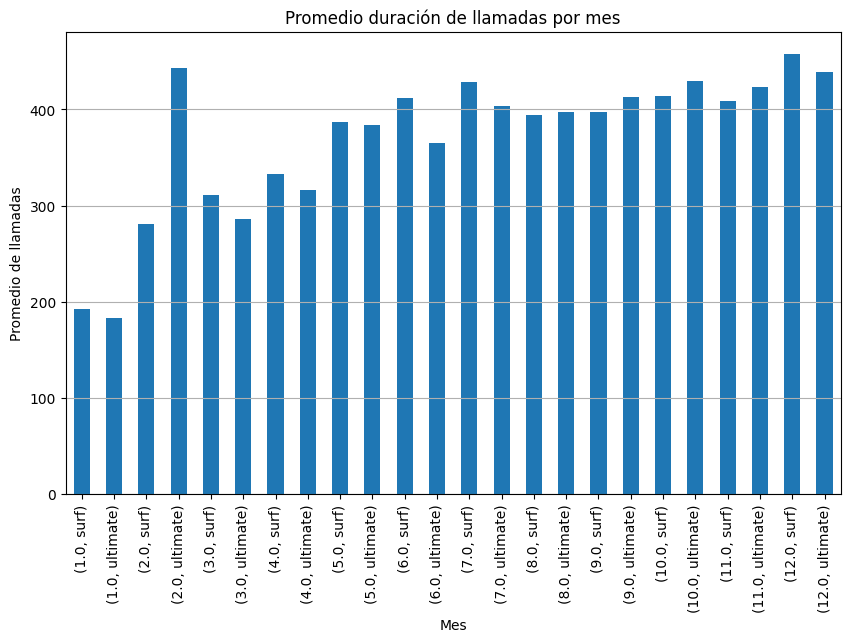

In [31]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.

average_calls = month_data_users.groupby(['month','plan'])['calls_duration'].mean()
display(average_calls)


plt.figure(figsize=(10, 6))
average_calls.plot(x = 'Plan',
        kind = 'bar',
        title = 'Promedio duración de llamadas por mes',
        xlabel = 'Mes',
        ylabel = 'Promedio de llamadas')

plt.grid(axis = 'y')

plt.show()

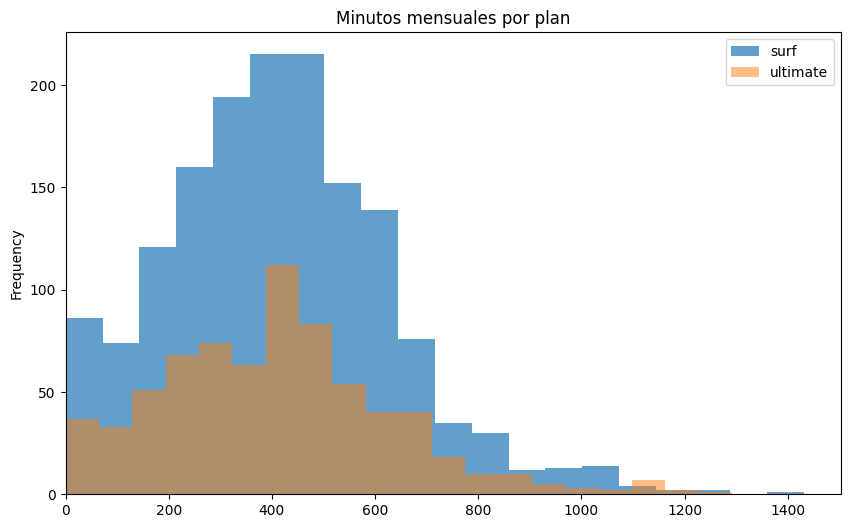

In [32]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.

#Minutos por plan

surf_minutes = month_data_users[month_data_users['plan'] == 'surf']['calls_duration']
ultimate_minutes = month_data_users[month_data_users['plan'] == 'ultimate']['calls_duration']

plt.figure(figsize=(10, 6))
surf_minutes.plot(kind = 'hist', bins = 20, title = 'Minutos mensuales por plan', ylabel = 'Frequencia', xlabel = 'Minutos mensuales', alpha = 0.7)

ultimate_minutes.plot(kind = 'hist', bins = 20, alpha = 0.5)

plt.xlim(left=0)


plt.legend(['surf', 'ultimate'])


plt.show()



[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [33]:
# Calcula la media y la varianza de la duración mensual de llamadas.

calls_duration_average = month_data_users.groupby(['month', 'plan'])['calls_duration'].agg(['mean', 'var'])

print('Media: ')
display(calls_duration_average['mean'])
print()
print('Varianza: ')
display(calls_duration_average['var'])


Media: 


month  plan    
1.0    surf        192.840000
       ultimate    183.162500
2.0    surf        280.851111
       ultimate    443.171667
3.0    surf        310.970000
       ultimate    285.701667
4.0    surf        332.380000
       ultimate    316.508095
5.0    surf        387.108000
       ultimate    383.664828
6.0    surf        411.450625
       ultimate    365.358222
7.0    surf        428.060917
       ultimate    403.767288
8.0    surf        394.474717
       ultimate    397.274789
9.0    surf        397.133298
       ultimate    413.287326
10.0   surf        414.435733
       ultimate    429.217238
11.0   surf        408.255415
       ultimate    423.814683
12.0   surf        457.547074
       ultimate    438.824832
Name: mean, dtype: float64


Varianza: 


month  plan    
1.0    surf        14795.440200
       ultimate    14991.369958
2.0    surf        46959.219961
       ultimate    48579.581537
3.0    surf        31821.317991
       ultimate    54273.917252
4.0    surf        45615.666796
       ultimate    31057.727496
5.0    surf        50778.127459
       ultimate    39290.610940
6.0    surf        39424.054023
       ultimate    33837.770156
7.0    surf        53364.540232
       ultimate    64844.426958
8.0    surf        46639.240873
       ultimate    47680.189425
9.0    surf        39785.302974
       ultimate    50994.505514
10.0   surf        44103.681803
       ultimate    47081.623851
11.0   surf        43560.874928
       ultimate    53273.637319
12.0   surf        53646.781898
       ultimate    53967.731609
Name: var, dtype: float64

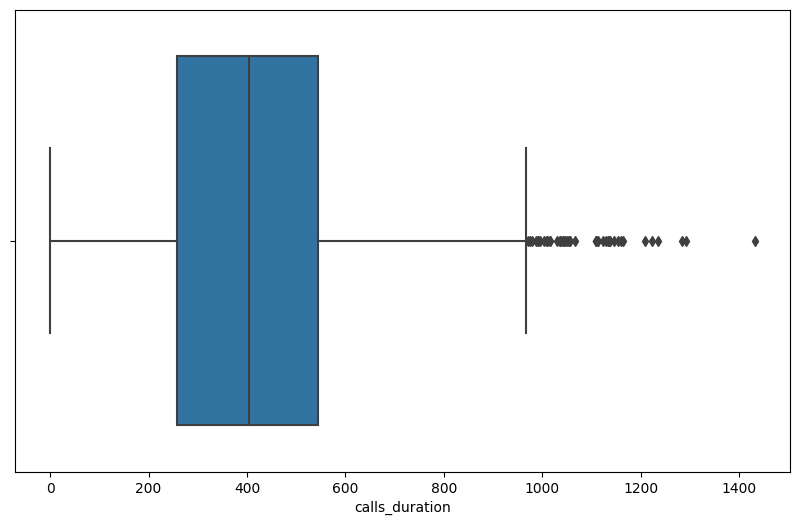

In [34]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas

plt.figure(figsize=(10, 6))

sns.boxplot(x = 'calls_duration', data = month_data_users)


plt.show()

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a las llamadas. ¿Su comportamiento varía en función del plan?]


La duración promedio de llamadas hechas por los usuarios de ambos planes los primeros meses del años es bajo, comparado con los ultimos meses del año, tendiendo a crecer a medida que avanzan los meses. Esto indica que los usuarios en general están realizando más llamadas con el tiempo.

La duración promedio promedio de las llamadas tiende a ser mayor para los usuarios del plan Surf en comparación con los usuarios del plan Ultimate en la mayoría de los meses.

En diciembre, la duración promedio de las llamadas alcanza su punto máximo para ambos planes, con el plan Surf superando por poco al plan Ultimate en este mes.

En los primeros meses del año, La duración promedio de las llamadas realizadas es generalmente más alta para los usuarios del plan Surf, excepto en febrero, que la cantidad de llamadas hechas por los usuarios del plan ultimate es casi 1/3 mayor que la del plan surf, pero luego se equilibra o incluso se invierte a favor de los usuarios del plan Ultimate en los meses siguientes.


La varianza en la duración de las llamadas es más alta para el plan Ultimate en comparación con el plan Surf en la mayoría de los meses. Esto indica que hay una mayor variabilidad en la duración de las llamadas entre los usuarios del plan Ultimate.


En resumen, aunque hay algunas diferencias en la duración de las llamadas entre los planes Surf y Ultimate, ambos planes muestran un aumento en la duración de las llamadas a lo largo del año con una variabilidad mayor en el plan Ultimate.


Con el histograma se puede evidenciar que los usuarios del plan 'surf' necesitan una mayor cantidad de minutos mensuales para su consumo, comparados con el plan 'ultimate'. Necesitando los ususarios del plan 'surf' una cantidad entre 300 y 600 minutos mensualescon mayor frecuencia. El plan Surf solo tiene 500 minutos incluidos, por lo que en algunos casos los ususarios sobrepasaron los minutos incluidos, por el contrario, esto no pasó con los usuarios Ultimate, los cuales tienen 3000 minutos incluidos en su plan, y necesitan con menos frecuencia entre 300 y 600 minutos.


El diagrama de caja (boxplot) nos dice:

El valor mínimo es igual a 0 minutos. Se encuentra al final del bigote izquierdo.

Primer cuartil Q1: 250 minutos.

Segundo cuartil Q2 o mediana: 400 minutos.

Tercer cuartil Q3: 550 minutos.

El máximo es igual a 950 minutos. Se encuentra al final del bigote derecho.

La distancia entre Q1 y Q3 se denomina intervalo intercuartílico (o IQR). Mide la dispersión de los datos situados en la mitad central. En otras palabras, es el intervalo del 50% medio de la muestra.

Q3 - Q1 = 300 minutos.

### Mensajes

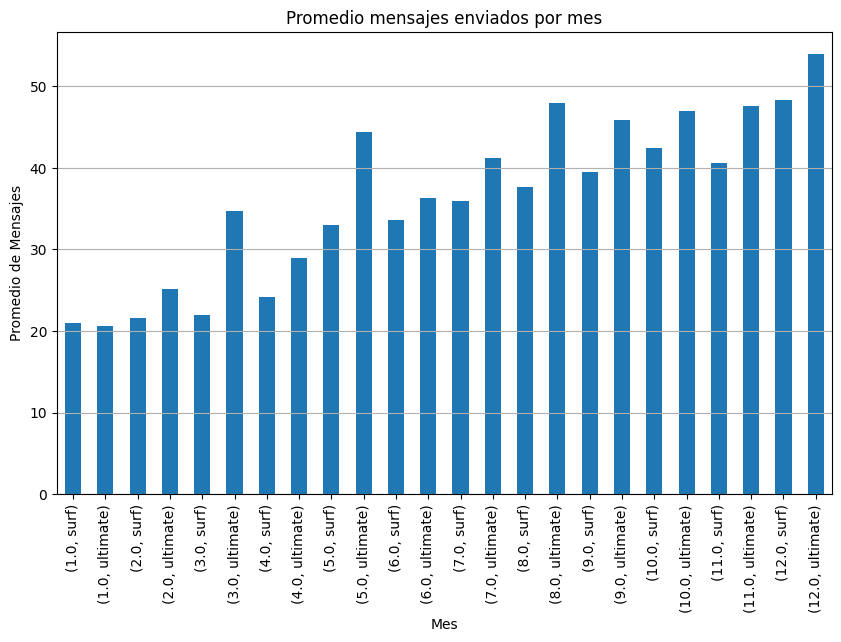

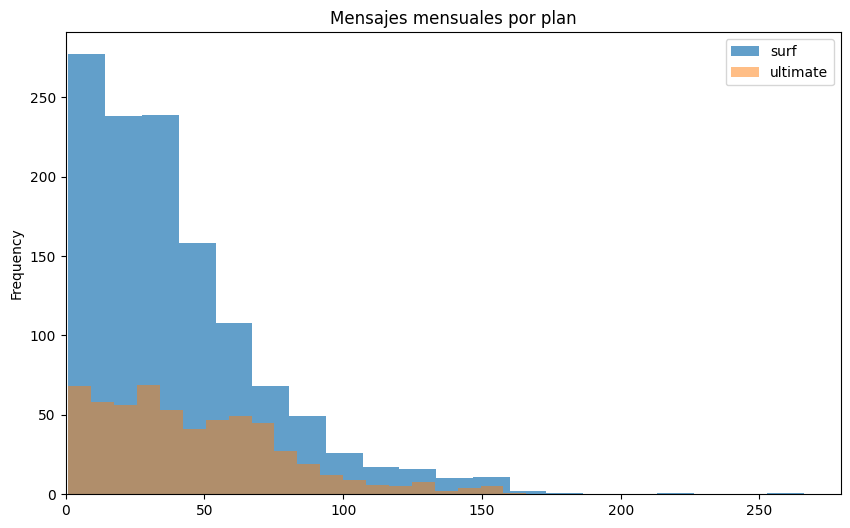

In [35]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan

average_messages = month_data_users.groupby(['month','plan'])['messages_per_month'].mean()

plt.figure(figsize=(10, 6))
average_messages.plot(x = 'Plan',
        kind = 'bar',
        title = 'Promedio mensajes enviados por mes',
        xlabel = 'Mes',
        ylabel = 'Promedio de Mensajes')

plt.grid(axis = 'y')

plt.show()


# Compara el número de mensajes mensuales que necesitan los usuarios de cada plan. Traza un histograma.


surf_messages = month_data_users[month_data_users['plan'] == 'surf']['messages_per_month']
ultimate_messages = month_data_users[month_data_users['plan'] == 'ultimate']['messages_per_month']

plt.figure(figsize=(10, 6))
surf_messages.plot(kind = 'hist', bins = 20, title = 'Mensajes mensuales por plan', ylabel = 'Frequencia', xlabel = 'Mensajes mensuales', alpha = 0.7)

ultimate_messages.plot(kind = 'hist', bins = 20, alpha = 0.5)

plt.xlim(left=0)


plt.legend(['surf', 'ultimate'])


plt.show()




In [36]:
# Calcula la media y la varianza de los mensajes que tienden a enviar los usuarios cada mes.

var_med_messages = month_data_users.groupby(['month', 'plan'])['messages_per_month'].agg(['mean', 'var'])

print('Media: ')
print(var_med_messages['mean'])
print()
print('Varianza: ')
print(var_med_messages['var'])

Media: 
month  plan    
1.0    surf        21.000000
       ultimate    20.666667
2.0    surf        21.600000
       ultimate    25.166667
3.0    surf        21.937500
       ultimate    34.714286
4.0    surf        24.166667
       ultimate    28.937500
5.0    surf        33.017857
       ultimate    44.333333
6.0    surf        33.616438
       ultimate    36.289474
7.0    surf        35.945055
       ultimate    41.212766
8.0    surf        37.596774
       ultimate    47.929825
9.0    surf        39.523179
       ultimate    45.901408
10.0   surf        42.433862
       ultimate    46.977528
11.0   surf        40.553097
       ultimate    47.601942
12.0   surf        48.326772
       ultimate    53.936508
Name: mean, dtype: float64

Varianza: 
month  plan    
1.0    surf                NaN
       ultimate     310.333333
2.0    surf         512.800000
       ultimate     465.366667
3.0    surf         352.062500
       ultimate     613.904762
4.0    surf         534.028571
       u

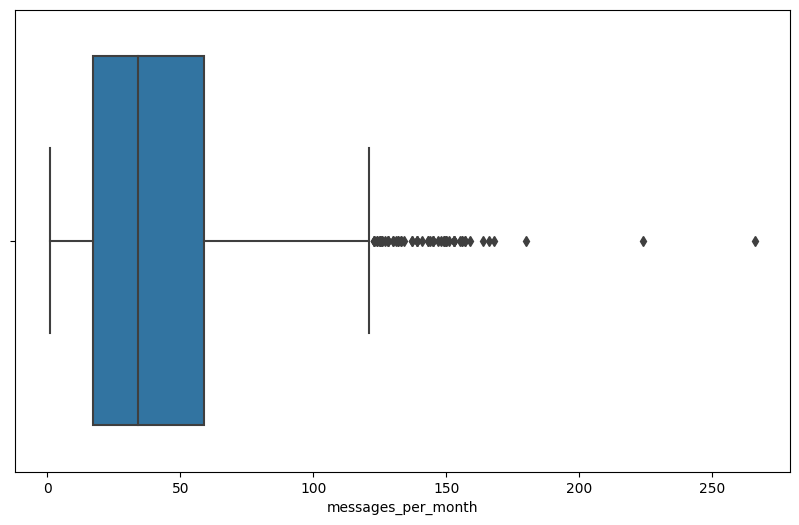

In [37]:
# Traza un diagrama de caja para visualizar la distribución de los mensajes mensuales

plt.figure(figsize=(10, 6))

sns.boxplot(x = 'messages_per_month', data = month_data_users)


plt.show()

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a los mensajes. ¿Su comportamiento varía en función del plan?]


El número de mensajes enviados mensualmente por los usuarios tiende a aumentar a lo largo del año para ambos planes.

En la mayoría de los meses, el número de mensajes enviados es un poco mayor para el plan Ultimate en comparación con el plan Surf. Sin embargo, la diferencia no es mucho mayor en la mayoría de los casos.

La varianza en el número de mensajes enviados mensualmente es variable a lo largo del año para ambos planes, con algunos meses mostrando una mayor variabilidad que otros.

En resumen, aunque hay algunas diferencias en el número de mensajes enviados entre los planes Surf y Ultimate, en general, ambos planes muestran un aumento en el número de mensajes enviados a lo largo del año con cierta variabilidad en la cantidad de mensajes enviados en diferentes meses.

Con el histograma se puede evidenciar que los usuarios del plan 'surf' necesitan una mayor cantidad de mensajes mensuales para su consumo, comparados con el plan 'ultimate'. Necesitando los ususarios del plan 'surf' 50 mensajes mensuales con mayor frecuencia. El plan Surf  tiene 50 mensajes incluidos, por lo que en algunos casos los ususarios sobrepasaron los mensajes incluidos, por el contrario, esto no pasó con los usuarios Ultimate, los cuales tienen 1000 minutos incluidos en su plan, y necesitan con menos frecuencia, estos ususarios por lo general necesitaron con mayor frecuencia entre 30 y 40 mensajes mensuales, un valor mucho menor a la cantidad incluida en su plan, por lo que es poco probable que se hayan pasado del limite.


El diagrama de caja (boxplot) nos dice:

El valor mínimo es igual a 0 minutos. Se encuentra al final del bigote izquierdo.

Primer cuartil Q1: 20 mensajes.

Segundo cuartil Q2 o mediana: 25 mensajes.

Tercer cuartil Q3: 60 mensajes.

El máximo es igual a 130 mensajes. Se encuentra al final del bigote derecho.

La distancia entre Q1 y Q3 se denomina intervalo intercuartílico (o IQR). Mide la dispersión de los datos situados en la mitad central. En otras palabras, es el intervalo del 50% medio de la muestra.

Q3 - Q1 = 40 mensajes.

### Internet

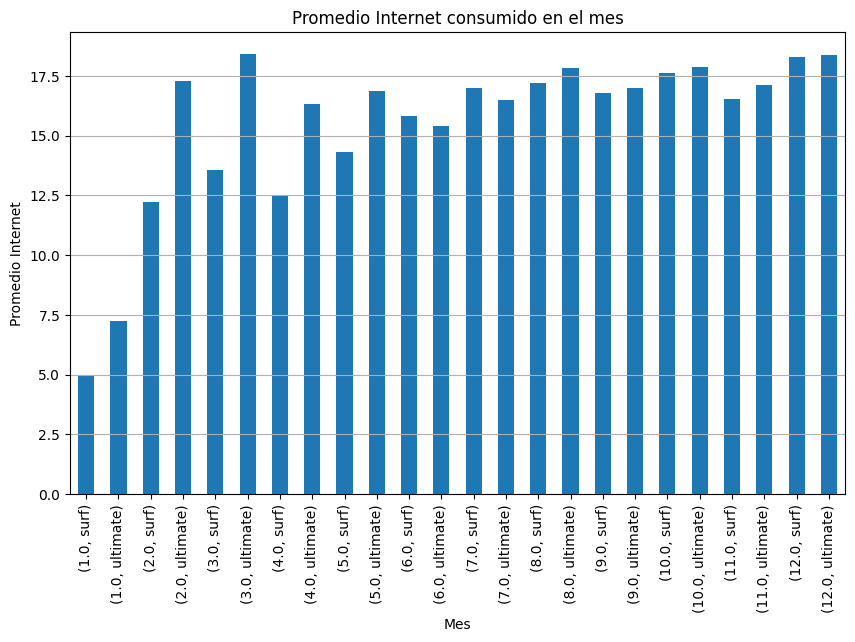

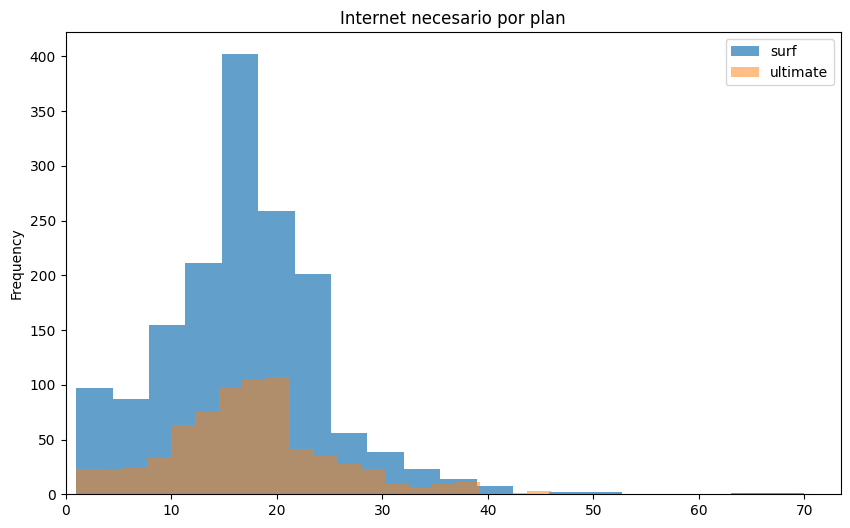

In [38]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan

average_gb = month_data_users.groupby(['month','plan'])['gb_used_per_month'].mean()

plt.figure(figsize=(10, 6))
average_gb.plot(x = 'Plan',
        kind = 'bar',
        title = 'Promedio Internet consumido en el mes',
        xlabel = 'Mes',
        ylabel = 'Promedio Internet')

plt.grid(axis = 'y')

plt.show()


# Compara la cantidad de Gb mensuales que necesitan los usuarios de cada plan. Traza un histograma.


surf_internet = month_data_users[month_data_users['plan'] == 'surf']['gb_used_per_month']
ultimate_internet = month_data_users[month_data_users['plan'] == 'ultimate']['gb_used_per_month']

plt.figure(figsize=(10, 6))
surf_internet.plot(kind = 'hist', bins = 20, title = 'Internet necesario por plan', ylabel = 'Frequencia', xlabel = 'Gb', alpha = 0.7)

ultimate_internet.plot(kind = 'hist', bins = 20, alpha = 0.5)

plt.xlim(left=0)


plt.legend(['surf', 'ultimate'])


plt.show()


In [39]:
# Calcula la media y la varianza de la cantidad de internet que consumen los usuarios cada mes
var_med_internet = month_data_users.groupby(['month','plan'])['gb_used_per_month'].agg(['mean', 'var'])
print('Media: ')
print(var_med_internet['mean'])
print()
print('Varianza: ')
print(var_med_internet['var'])

Media: 
month  plan    
1.0    surf         5.000000
       ultimate     7.250000
2.0    surf        12.222222
       ultimate    17.285714
3.0    surf        13.565217
       ultimate    18.416667
4.0    surf        12.469388
       ultimate    16.333333
5.0    surf        14.302632
       ultimate    16.862069
6.0    surf        15.810526
       ultimate    15.425532
7.0    surf        17.016667
       ultimate    16.491525
8.0    surf        17.201258
       ultimate    17.845070
9.0    surf        16.777202
       ultimate    17.011628
10.0   surf        17.632479
       ultimate    17.885714
11.0   surf        16.548043
       ultimate    17.118110
12.0   surf        18.296530
       ultimate    18.397351
Name: mean, dtype: float64

Varianza: 
month  plan    
1.0    surf         18.000000
       ultimate     14.916667
2.0    surf         41.444444
       ultimate     37.904762
3.0    surf         63.984190
       ultimate    138.628788
4.0    surf         54.212585
       ultimate

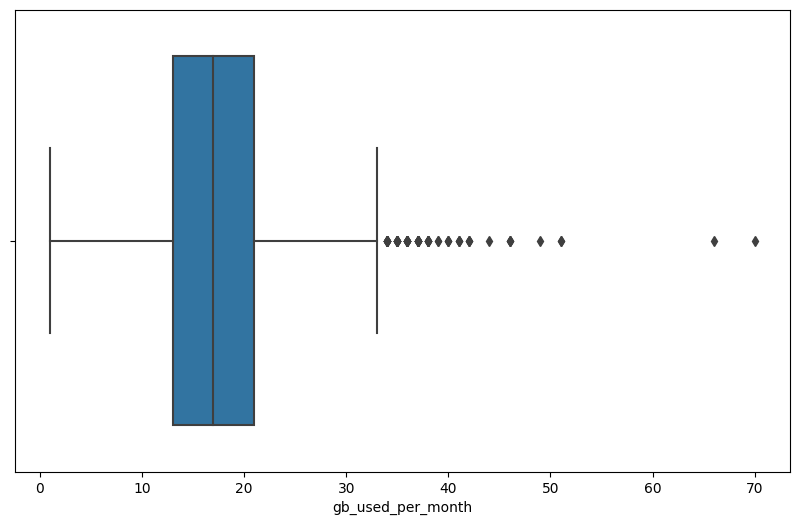

In [40]:
# Traza un diagrama de caja para visualizar la distribución de los mensajes mensuales
plt.figure(figsize=(10, 6))

sns.boxplot(x = 'gb_used_per_month', data = month_data_users)


plt.show()

[Elabora las conclusiones sobre cómo los usuarios tienden a consumir el tráfico de Internet. ¿Su comportamiento varía en función del plan?]

El consumo de internet de los usuarios de ambos planes los primeros meses del años es bajo, comparado con los ultimos meses del año, tendiendo a crecer a medida que avanzan los meses.

En los primeros 6 meses los ususarios del plan "surf" tendieron a consumir mucha menor cantidad de Gb que los ususarios con el plan de 'ultimate', sobre todo en los meses de febrero y marzo en donde hubo una diferencia de aproximadamente 5 Gb. 


En los meses a partir de junio (mes 6) los ususarios de ambos planes se comportaron realtivamente igual teniendo una diferencia de consumo aproximadamente de 1 Gb, siempre los usuarios del plan "ultimate" teniendo el mayor consumo, exepto en el mes de julio en donde los ususarios del plan "surf" tuvieron mayor consumo que los del plan "ultimate".

En resumen, podemos decir que, en general, el plan "Ultimate" tiende a tener un consumo de internet mayor y una varianza más alta en comparación con el plan "Surf". Sin embargo, la diferencia entre los dos planes puede variar según el mes.


Con el histograma se puede evidenciar que los usuarios del plan 'surf' necesitan una mayor cantidad de Gb mensuales para su consumo, comparados con el plan 'ultimate'. Necesitando los ususarios del plan 'surf' una cantidad entre 15Gb y 25Gb mensales.


El diagrama de caja nos dice:

El valor mínimo es igual a 0 Gb. Se encuentra al final del bigote izquierdo.

Primer cuartil Q1: 13Gb.

Segundo cuartil Q2 o mediana: 17 Gb.

Tercer cuartil Q3: 21Gb.

El máximo es igual a 31Gb. Se encuentra al final del bigote derecho.

La distancia entre Q1 y Q3 se denomina intervalo intercuartílico (o IQR). Mide la dispersión de los datos situados en la mitad central. En otras palabras, es el intervalo del 50% medio de la muestra.

Q3 - Q1 = 8 Gb.

## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

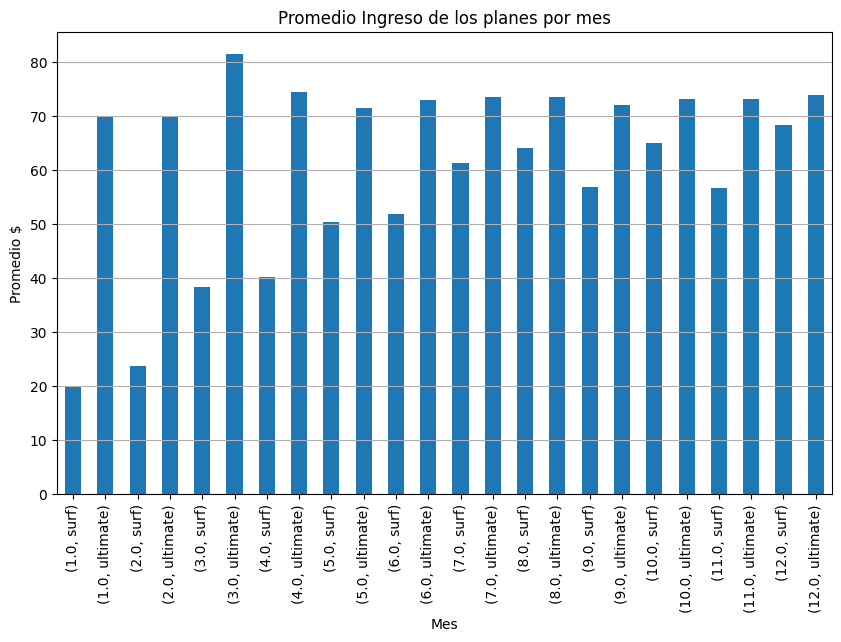

In [41]:
# Compara el ingreso promedio de cada plan por cada mes. Traza un gráfico de barras para visualizarla.

average_plan = month_data_users.groupby(['month','plan'])['total_plan'].mean()

plt.figure(figsize=(10, 6))
average_plan.plot(x = 'Plan',
        kind = 'bar',
        title = 'Promedio Ingreso de los planes por mes',
        xlabel = 'Mes',
        ylabel = 'Promedio $')

plt.grid(axis = 'y')

plt.show()

In [42]:
# Calcula la media y la varianza del ingreso de los planes cada mes
var_med_plan = month_data_users.groupby(['month','plan'])['total_plan'].agg(['mean', 'var'])
print('Media: ')
print(var_med_plan['mean'])
print()
print('Varianza: ')
print(var_med_plan['var'])

promedio_surf = month_data_users[month_data_users['plan'] == 'surf']['total_plan'].mean()
promedio_ultimate = month_data_users[month_data_users['plan'] == 'ultimate']['total_plan'].mean()
print('Promedio de ingresos del plan Surf durante todo el año: ', promedio_surf)
print()
print('Promedio de ingresos del plan Utimate durante todo el año: ', promedio_ultimate)


Media: 
month  plan    
1.0    surf        20.000000
       ultimate    70.000000
2.0    surf        23.662120
       ultimate    70.000000
3.0    surf        38.323500
       ultimate    81.428571
4.0    surf        40.262346
       ultimate    74.375000
5.0    surf        50.364445
       ultimate    71.428571
6.0    surf        51.750469
       ultimate    72.972973
7.0    surf        61.354021
       ultimate    73.404255
8.0    surf        64.015463
       ultimate    73.508772
9.0    surf        56.854326
       ultimate    71.971831
10.0   surf        64.978578
       ultimate    73.068182
11.0   surf        56.716289
       ultimate    73.039216
12.0   surf        68.283588
       ultimate    73.920000
Name: mean, dtype: float64

Varianza: 
month  plan    
1.0    surf                NaN
       ultimate       0.000000
2.0    surf          25.502614
       ultimate       0.000000
3.0    surf         539.566833
       ultimate     480.952381
4.0    surf        1250.859518
       u

[Elabora las conclusiones sobre cómo difiere el ingreso entre los planes.]


El ingreso del plan ultimate fue mucho mayor a lo largo del año, sin embargo raras veces los usuarios pagaron valores extras en este plan, a diferencia del plan surf, en la que en todos los meses, excepto enero, los ususarios pagaron tarifas extras, llegando al mes de enero a casi igualar a lo que vale un plan Ultimate ($70).

El pago mensual promedio para el plan Ultimate es constante en 70$ durante todo el año.

El pago mensual promedio para el plan Surf incrementa a lo largo del año, teniendo un ingreso promedio de $60.

La varianza en los pagos mensuales para el plan Surf es bastante alta, lo que indica una gran variabilidad en los pagos de los usuarios. Por otro lado, la varianza en los pagos mensuales para el plan Ultimate es mucho más baja y, incluso 0 en algunos meses, lo que indica una mayor consistencia en los pagos de los usuarios.

Aunque el plan Surf puede tener pagos mensuales más bajos, los usuarios pueden experimentar una mayor variabilidad en sus facturas mensuales debido a los cargos adicionales por exceder los límites del paquete. Por otro lado, el plan Ultimate ofrece una tarifa mensual fija más alta pero con una menor variabilidad en los pagos mensuales, por lo que los ingresos por parte de los ususiarios son más predecibles.



## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [43]:
# Prueba las hipótesis

#  Hipótesis nula =  los ingresos promedio  procedentes de los usuarios de los planes de llamada Ultimate y Surf son iguales
#  Hipótesis alternativa = los ingresos promedio  procedentes de los usuarios de los planes de llamada Ultimate y Surf son diferentes
# Hipótesis sobre la igualdad de las medias de dos poblaciones
# Prueba estadística = Prueba t
month_data_users ['total_plan']= month_data_users['total_plan'].fillna(0)

surf = month_data_users[month_data_users['plan'] == 'surf']['total_plan']
ultimate = month_data_users[month_data_users['plan'] == 'ultimate']['total_plan']

# Significación estadística crítica
alpha = 0.05

# realiza la prueba t 

results = st.ttest_ind(surf, ultimate, equal_var = False)

print('Valor p: ', results.pvalue)

# compara los valores p obtenidos con el nivel de significación estadística

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")





Valor p:  4.14224252619592e-14
Rechazamos la hipótesis nula


[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [44]:
# Prueba las hipótesis

#  Hipótesis nula =  El ingreso promedio de los usuarios del área NY-NJ es igual al de los usuarios de otras regiones.
#  Hipótesis alternativa = El ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.
# Hipótesis sobre la igualdad de las medias de dos poblaciones
# Prueba estadística = Prueba t


surf_city = month_data_users[month_data_users['city'] == 'New York-Newark-Jersey City, NY-NJ-PA MSA']['total_plan']
ultimate_city = month_data_users[month_data_users['city'] == 'New York-Newark-Jersey City, NY-NJ-PA MSA']['total_plan']

# Significación estadística crítica
alpha = 0.05

# realiza la prueba t 

results = st.ttest_ind(surf_city, ultimate_city, equal_var = False)



print('Valor p: ', results.pvalue)

# compara los valores p obtenidos con el nivel de significación estadística

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")



Valor p:  1.0
No podemos rechazar la hipótesis nula


## Conclusión general

[En esta sección final, enumera tus conclusiones importantes. Asegúrate de que estas abarquen todas las decisiones (suposiciones) importantes que adoptaste y que determinaron la forma elegida para procesar y analizar los datos.]



Después de analizar los datos y realizar las pruebas estadísticas necesarias, se pueden extraer las siguientes conclusiones:

1. Duración promedio de las llamadas

La duración promedio de las llamadas tiende a aumentar a lo largo del año para ambos planes, teniendo el mayor pico en los meses de diciembre.

Los usuarios del plan Surf tienden a tener una duración promedio de llamadas ligeramente mayor que los del plan Ultimate en la mayoría de los meses, especialmente en los primeros meses del año, excepto en el mes de febrero, en el que el plan Ultimate tuvo un pico significativo.

Así ambos ususarios hayan tenido un consumo similar durante todo el año, los usuarios del plan 'surf' necesitan una mayor cantidad de minutos mensuales para su consumo, dado que su plan solo incluye 500 minutos al mes, comparados con el plan 'ultimate' que incluye 3000 minutos al mes. En algunos casos los ususarios del plan Surf sobrepasaron los minutos incluidos, por el contrario, esto no pasó con los usuarios Ultimate, los cuales tienen una cantidad muchisimo mayor de minutos incluidos.

2. Número de mensajes

El número de mensajes tiende a aumentar a lo largo del año para ambos planes.


En general, los usuarios del plan Ultimate tienden a enviar ligeramente más mensajes que los del plan Surf, pero la diferencia no es significativa.

Aunque los ususarios del plan Ultimate tengan un mayor consumo de mensajes de texto que los ususarios del plan Surf, no utilzian los mil mensajes incluidos, estos ususarios necesitan con mayor frecuencia un valor de 30 a 40 mensajes. Por otro lado, los usuarios del plan Surf necesitan mensualmente entre 40 a 50 mensajes, este plan tiene incluidos 50 mensajes, por lo que estos  frecuentemente estarían al limite de su plan y podrían pagar un valor extra por mensase.

3. Consumo de internet

El consumo de datos tiende a aumentar a lo largo del año para ambos planes, con picos en los meses de diciembre.

Los usuarios del plan Ultimate tienden a consumir más datos en promedio que los del plan Surf en la mayoría de los meses.

Así los ususarios del plan Ultimate tengan un mayor consumo de internet a lo largo del año, los usuarios del plan 'surf' necesitan una mayor cantidad de datos mensuales, dado que su plan solo incluye 15 Gb al mes, comparados con el plan 'ultimate' que incluye 30 Gb al mes. En gran parte de los casos los ususarios del plan Surf sobrepasaron la cantidad de navegación incluida, por el contrario, esto no pasó con los usuarios Ultimate, los cuales tienen una cantidad muchisimo mayor de data incluida.

Los ususarios del plan Surf utilizan mensualmente con mayor frecuencia de 15 a 20 Gb de internet, por lo que en varias ocasiones pagaron un valor extra de 10$ por Gb consumida.


4. Ingresos

El plan Ultimate tiene una tarifa mensual más alta, genera mayores ingresos promedio a lo largo del año en comparación con el plan Surf.


Los usuarios del plan Surf tienden a tener una mayor variabilidad en sus facturas mensuales debido a los cargos adicionales por exceder los límites del paquete, mientras que los usuarios del plan Ultimate tienen pagos mensuales más consistentes.

5. Pruebas de hipótesis


Se rechaza la hipótesis nula: Los ingresos promedio  procedentes de los usuarios de los planes de llamada Ultimate y Surf son iguales, lo que indica que hay diferencias importantes en los ingresos entre estos dos planes.



No hay suficiente evidencia para rechazar la hipótesis nula: dEl ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.



En general, el plan Ultimate genera mayores ingresos a lo largo del año en comparación con el plan Surf. Sin embargo, los usuarios del plan Surf tienden a experimentar una mayor variabilidad en sus facturas mensuales debido a los cargos adicionales por exceder los límites del paquete, lo que puede afectar la predictibilidad de los ingresos. Por lo tanto, aunque el plan Ultimate tiene una tarifa mensual más alta, ofrece una mayor estabilidad en los ingresos mensuales.

